In [2]:
import pandas as pd

In [3]:
# Load your features (returns) with fastparquet
df_features = pd.read_parquet(
    "features_returns.parquet",
    engine="fastparquet"
)

In [4]:
# If you also saved the BTC close prices in a separate file, load them as well
btc_close = pd.read_parquet(
    "btc_return.parquet",
    engine="fastparquet"
)

In [5]:
df_features.head()

Price,SMA200,EMA,RSI,MACD,ATR,OBV,Nasdaq,GLD
Date,,,,,,,,
2024-01-02,0.002870,0.008084,-0.037449,0.049755,-0.043753,0.079301,-0.016348,-0.002354
2024-01-03,0.002346,-0.002279,-0.174843,-0.097310,0.137460,-0.086563,-0.011766,-0.008337
2024-01-04,0.002606,0.003724,0.192212,-0.009811,0.027591,0.062264,-0.005613,0.001005
2024-01-05,0.002525,0.002963,-0.041495,-0.020283,-0.023838,-0.062249,0.000949,0.000158
2024-01-08,0.003080,0.014131,0.173269,0.159384,0.096113,0.087751,0.022012,-0.007816


In [6]:
btc_close.head()

,BTC_close
Date,
2024-01-02,0.017901
2024-01-03,-0.046928
2024-01-04,0.031081
2024-01-05,-0.000390
2024-01-08,0.063579


In [7]:
news_sentiments = pd.read_parquet(
    "df_news_sentiment.parquet",
    engine="fastparquet"
)

In [8]:
news_sentiments.head()

,titles,urls,sources,descriptions,article_contents,mean_sentiment
date,,,,,,
2024-01-01,"[Bitcoin price surges above $45,000 for first ...",[https://www.livemint.com/market/cryptocurrenc...,"[Livemint, CNBC]",[Bitcoin price surged on expectation that the ...,[Bitcoin price surged over 6% to break above $...,0.599507
2024-01-02,[The hullabaloo over crypto has quietened desp...,[https://www.livemint.com/opinion/online-views...,"[Livemint, Hot Hardware, CNBC, Business Inside...",[Bitcoin’s price shot up in 2023 but few seeme...,[This is a Mint Premium article gifted to you....,0.302295
2024-01-03,"[Biggest stock movers today: Crypto stocks, So...",[https://seekingalpha.com/news/4051785-biggest...,"[Seeking Alpha, investing.com, investing.com]",[Stock futures inched lower in the early tradi...,"[None, None, None]",NaN
2024-01-04,"[Bitcoin price in Saudi Arabia on January 4, 2...",[https://www.bolnews.com/business/2024/01/btc-...,"[BOL News, Yahoo Finance, Motley Fool Australi...","[As of January 04, 2024, the Bitcoin market in...","[04th Jan, 2024. 07:22 pm\nShare\nListen\nFont...",0.165357
2024-01-05,[Elon Musk drops price of X gold checks amid r...,[https://arstechnica.com/tech-policy/2024/01/c...,"[Ars Technica, Investing.com, Investing.com, i...",[Reports come the same week X reduced the cost...,[There's currently a surge in cryptocurrency a...,-0.506613


In [9]:
df_features.columns

Index(['SMA200', 'EMA', 'RSI', 'MACD', 'ATR', 'OBV', 'Nasdaq', 'GLD'], dtype='object', name='Price')

In [10]:
news_sentiments.columns

Index(['titles', 'urls', 'sources', 'descriptions', 'article_contents',
       'mean_sentiment'],
      dtype='object')

In [11]:
# 1) (Optional) Harmonize the index names so it’s clearer when you print them
df_features.index.name = "date"
news_sentiments.index.name     = "date"

# 2) Pull in just the mean_sentiment series
sent = news_sentiments["mean_sentiment"]

# 3) Join it onto your features
df_features = df_features.join(sent, how="left")

# 4) Fill days with no news
df_features["mean_sentiment"].fillna(0.0, inplace=True)

# 5) Inspect
df_features.head()


,SMA200,EMA,RSI,MACD,ATR,OBV,Nasdaq,GLD,mean_sentiment
date,,,,,,,,,
2024-01-02,0.002870,0.008084,-0.037449,0.049755,-0.043753,0.079301,-0.016348,-0.002354,0.302295
2024-01-03,0.002346,-0.002279,-0.174843,-0.097310,0.137460,-0.086563,-0.011766,-0.008337,0.000000
2024-01-04,0.002606,0.003724,0.192212,-0.009811,0.027591,0.062264,-0.005613,0.001005,0.165357
2024-01-05,0.002525,0.002963,-0.041495,-0.020283,-0.023838,-0.062249,0.000949,0.000158,-0.506613
2024-01-08,0.003080,0.014131,0.173269,0.159384,0.096113,0.087751,0.022012,-0.007816,0.122991


In [12]:
# 1) (Optional) Harmonize the index names so it’s clearer when you print them
df_features.index.name = "date"
btc_close.index.name     = "date"

# 2) Pull in just the mean_sentiment series
close = btc_close["BTC_close"]

# 3) Join it onto your features
df_features = df_features.join(close, how="left")

# 5) Inspect
df_features.head()

,SMA200,EMA,RSI,MACD,ATR,OBV,Nasdaq,GLD,mean_sentiment,BTC_close
date,,,,,,,,,,
2024-01-02,0.002870,0.008084,-0.037449,0.049755,-0.043753,0.079301,-0.016348,-0.002354,0.302295,0.017901
2024-01-03,0.002346,-0.002279,-0.174843,-0.097310,0.137460,-0.086563,-0.011766,-0.008337,0.000000,-0.046928
2024-01-04,0.002606,0.003724,0.192212,-0.009811,0.027591,0.062264,-0.005613,0.001005,0.165357,0.031081
2024-01-05,0.002525,0.002963,-0.041495,-0.020283,-0.023838,-0.062249,0.000949,0.000158,-0.506613,-0.000390
2024-01-08,0.003080,0.014131,0.173269,0.159384,0.096113,0.087751,0.022012,-0.007816,0.122991,0.063579


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

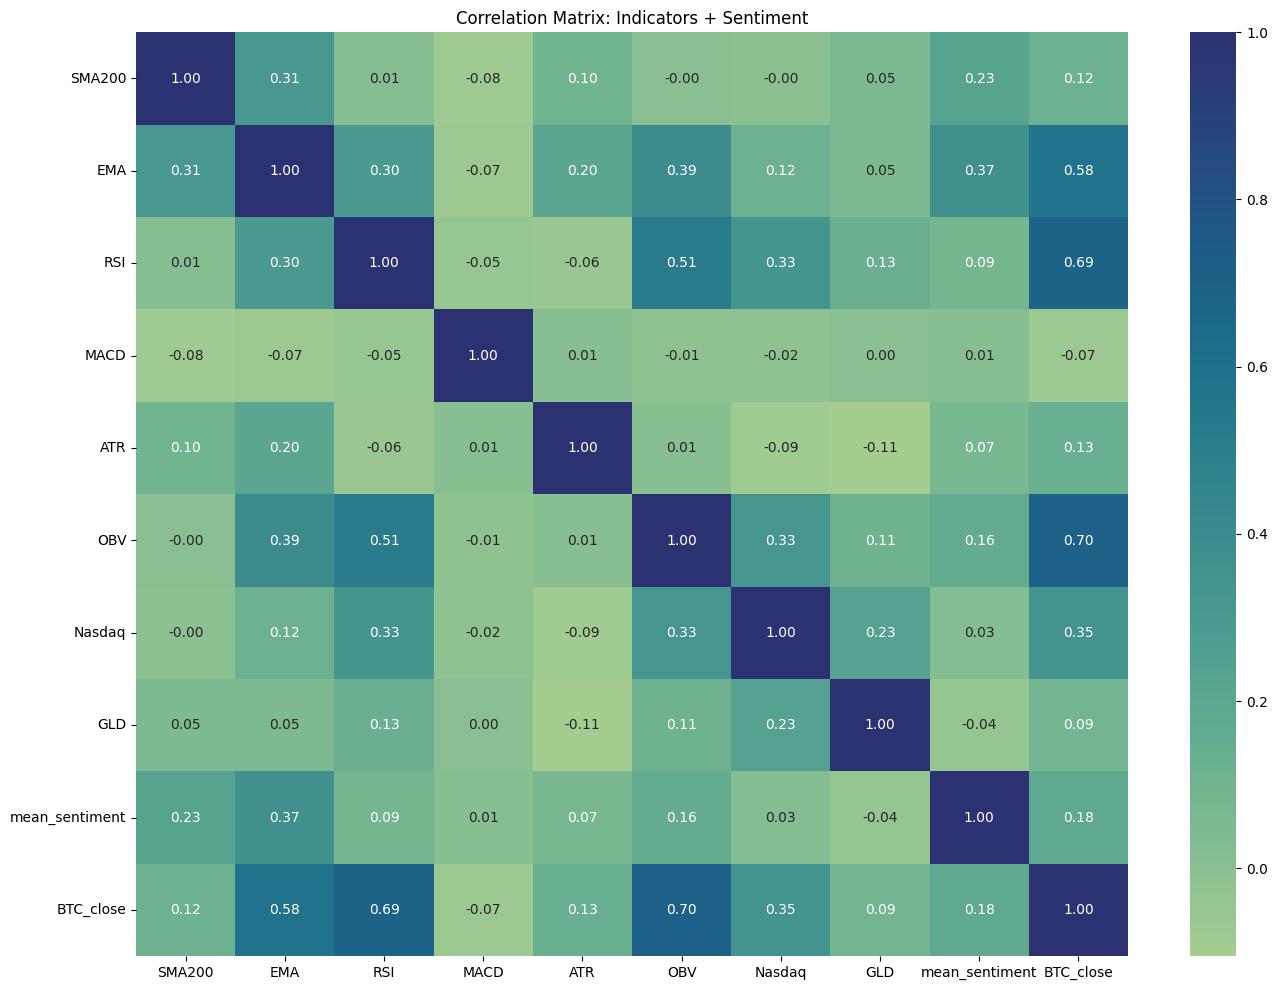

In [14]:
corr = df_features.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f")
# solo nos dice si el precio vs sentimiento ambos suben o bajan juntos (por la tendecia!)
plt.title('Correlation Matrix: Indicators + Sentiment')
plt.show()

Pearson r between same-day sentiment and price: ~0.18

Commprobamos si el sentimiento de hoy se anticipa de verdad al movimiento del precio mañana, y no simplemente está correlacionada con el nivel del precio (que tiende a subir o bajar por su propia inercia)

In [15]:
# transformar precio en retorno
# convertimos precios en retornos diarios, que centran la variación relativa de un día a otro
# queremos el retorno del día siguiente (t+1), no del mismo día
returns = df_features["BTC_close"].pct_change().shift(-1)
# alinear series y calcular pearson r
sent = df_features["mean_sentiment"].dropna()
corr_next = sent.corr(returns.reindex(sent.index))
# retorno (mañana) vs sentimiento (hoy) nos dice si la variable de noticias tiene verdadero poder predictivo
# para la dirección del mercado
print("Sentiment vs. next-day return:", corr_next)


Sentiment vs. next-day return: 0.06902429496653419


Pearson r between same-day sentiment and next-day return: ~ 0.07

Those low numbers reflect all the noise and trend in price itself - nothing suprising so far

¿ por qué suavizar y "binnear" el sentimiento? :

tras ver que la correlación simple entre el sentimiento diario y el retorno siguiente (r~0.07) era prácticamente ruido, aplicamos lo siguiente:

objetivo: reducir el ruido de las valoraciones diarias, que pueden saltar arriba/abajo por pequeñas variaciones de pocas noticias

intuición: un "pulso" de noticas suele durar varios días; la media móvil captura mejor esa tendencia de sentimiento continuo

In [ ]:
# 1) Create a 3-day rolling sentiment
df_features["sent_3d"] = df_features["mean_sentiment"].rolling(3).mean()


df_features["ret_next"] = df_features["BTC_close"].pct_change().shift(-1)
# repetimos esto para asegurarnos de comprar siempre la misma serie de retornos
# con la nueva variable suavizada

# 3) Look at correlation of the 3-day average
print("3-day avg sentiment vs next-day return:",
      df_features["sent_3d"].corr(df_features["ret_next"]))
# objetivo: ver si la media movil suaviza el ruido y mejora la correlación
# resultado esperado: puede subir un poco, pero suele seguir siendo bajo
# (indica que el efecto no es puramente lineal)

# 4) Bin sentiment into quantiles and inspect avg future return
df_features["sent_q"] = pd.qcut(df_features["mean_sentiment"], 5, labels=False)
pivot = df_features.groupby("sent_q")["ret_next"].mean()
print(pivot)
# objetivo: sacar a la superficie los efectos no lineales
# intuición: tal vez no exista una relación proporcional en todo el rango del sentimiento
# pero sí un "salto" cuando el sentimiento es extremo


3-day avg sentiment vs next-day return: -0.0005408016858584564
sent_q
0   -0.110770
1   -1.900310
2   -1.134963
3   -1.322892
4    1.909800
Name: ret_next, dtype: float64


Binning sentiment into quintiles reveals a clear stratification

When we split the daily mean sentiment into five buckets (0-20%, 20-40%, ...,80-100%), then compute the fraction of days in each bucket where BTC closed up the next day

qué buscamos?
- cómo varía el retorno medio en cada 20% de días ordenados por sentimiento?
- un patrón monotónico (p. ej. retorno negativo en los quintiles bajos y positivo solo en el quintil más alto) revela un edge direccional que la correlación lineal no capturó
en resumen, los quintiles exponen la estratificación: solo en los días de sentimiento extremadamente alto cambia la probabilidad de subida de forma significativa

este flujo permitiría pasar de un análisis lineal a un análisis de direccionalidad (que es lo que buscamos) basado en la fuerza del sentimiento extremo

ahora queremos traducir esa diferencia de magnitudes en un resumen de probabilidad de éxito más fácil de interpretar y de optimizar en un modelo de clasificación
- up_next = 1 si el precio sube al día siguiente, 0 si baja (o permanece igual)
- Así pasamos de predecir “¿cuánto sube?” a predecir “¿sube o no sube?”, un problema de clasificación

In [17]:
df_features["up_next"] = (df_features["ret_next"] > 0).astype(int)
# tasa de acierto por nivel de sentimiento
df_features.groupby("sent_q")["up_next"].mean()


sent_q
0    0.115385
1    0.211538
2    0.192308
3    0.250000
4    0.346154
Name: up_next, dtype: float64

tasa de acierto por nivel de sentimiento
- Para cada quintil de sentimiento (sent_q), sacamos el % de días en que up_next == 1.
- Esto nos da directamente la probabilidad empírica de un día alcista según el nivel de sentimiento.

Ventajas de esta transformación

Intuitiva: decir “en el top-20 % de días de sentimiento, la probabilidad de subir es 34.6 %” se entiende mejor que un retorno promedio de +1.9 %.

Adecua el problema a modelos de clasificación (logística, árboles, etc.), donde suele ser más fácil optimizar métricas como AUC, accuracy o precision/recall.

Evita sensibilidad a outliers extremos en magnitud de retorno—sólo importa la dirección, no el porcentaje exacto.

That is a monotonic rise in up-move probability as sentiment climbs - culminating in roughly a 3x higher win-rate in yout top-20% sentiment days versus the worst-20%

When the binning works when raw r doesn't
- Raw correlation averages together all the small ups and downs across thousands of data points, drowning out the pattern
- Quintiles highlight that only the most extreme positive-sentiment days actually flips the odds meaningfully

What it tells us for modeling
- Predictive signal: On days with extremely postive nexs sentiment, BTC is much more likely to rise the next day
- Feature encoding: A simple flag like
```
sent_high_flag = (mean_sentiment >= mean_sentiment.quantile(0.8)).astype(int)
```
- Non7linear / interaction effects: By feeding this flag (or the quintile code) alongside your technical indicators, your model can learn "sentimen only mqtters when volatility is high" or other richer joint patterns

Reframe: go from "predict how much the price moves" to "predict which way it moves"

In [18]:
df_features["sent_high_flag"] = (df_features["sent_q"] == 4).astype(int)


## ¿Por qué añadir `sent_high_flag`?

Después de todo el análisis vimos que **solo el quintil superior de sentimiento** (los días con `sent_q == 4`) mostraba un **salto notable** en la probabilidad de que BTC subiese al día siguiente (≈ 34.6 % vs. 11.5 % en el quintil más bajo). Por eso:

– Crea una variable binaria que vale 1 únicamente en los días de sentimiento extremado (top 20 %).
– En el 80 % restante, vale 0.

Ventajas de usar un flag

Simplicidad: el modelo ve directo “día de sentimiento muy alto” vs. “no”.

Robustez: elimina ruido de niveles intermedios de sentimiento.

Interacción: permite combinar fácilmente con otros indicadores (p.ej. sent_high_flag * ATR).

Preparación para clasificación

Al convertir el pattern más fuerte en un feature booleano, los algoritmos de clasificación (árboles, regresión logística, etc.) pueden explotar este “switch” de forma no lineal y asignarle peso significativo en la predicción de la dirección (up_next).

In [19]:
cols = ['SMA200','EMA','RSI','MACD','ATR','OBV','Nasdaq','GLD','sent_high_flag']
sub = df_features[cols]

Correlación con sent_high_flag:
 SMA200    0.181129
EMA       0.244278
RSI       0.055730
MACD      0.013196
ATR       0.036338
OBV       0.129920
Nasdaq    0.044221
GLD       0.001419
Name: sent_high_flag, dtype: float64


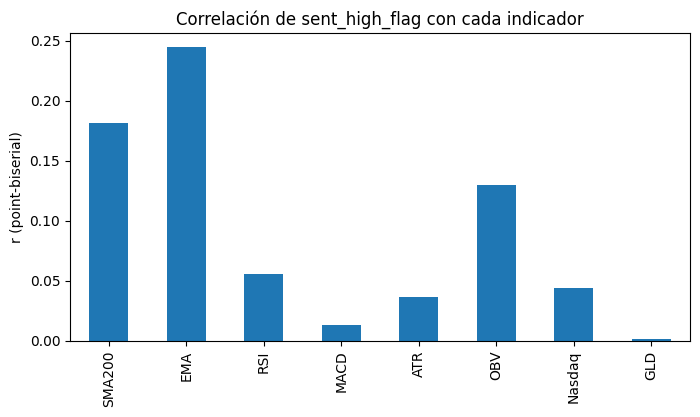

In [20]:
# calculamos la correlación (point-biserial para la flag)
corr_flag = sub.corr()['sent_high_flag'].drop('sent_high_flag')
print("Correlación con sent_high_flag:\n", corr_flag)

# visualizamos
import matplotlib.pyplot as plt
corr_flag.plot.bar(figsize=(8,4))
plt.title("Correlación de sent_high_flag con cada indicador")
plt.ylabel("r (point-biserial)")
plt.show()

## ¿Qué nos dice esto?

1. **EMA y SMA200 tienen la correlación más alta** (r≈0.25 y 0.18):
   - Los días con sentimiento muy alto suelen coincidir con valores de EMA/​SMA200 ligeramente más elevados.
   - **Interpretación**: en momentos de optimismo extremo, la tendencia de medio-largo plazo tiende a estar al alza.

2. **OBV también muestra cierta asociación** (r≈0.13):
   - El volumen acumulado tiende a ser mayor en días de `sent_high_flag = 1`.

3. **El resto de indicadores** (RSI, ATR, MACD, Nasdaq, GLD) tienen correlaciones bajas (<0.06):
   - Esto indica que el flag de sentimiento **aporta información complementaria** a la mayoría de tus indicadores.

---

## ¿Qué hacer con estas correlaciones?

1. **Mantener el flag como feature independiente**  
   ● Su baja correlación con la mayoría (excepto EMA/SMA200) confirma que añade señal **nueva**.

2. **Crear interacciones donde r sea moderada**  
   ● Dado que `EMA` y `SMA200` tienen la mayor sincronía con días de sentimiento extremo, podrías probar:  
   ```python
   df_features["flag_x_ema"]    = df_features["sent_high_flag"] * df_features["EMA"]
   df_features["flag_x_sma200"] = df_features["sent_high_flag"] * df_features["SMA200"]

In [21]:
df_features["flag_x_ema"]    = df_features["sent_high_flag"] * df_features["EMA"]
df_features["flag_x_sma200"] = df_features["sent_high_flag"] * df_features["SMA200"]

In [22]:
df_features.head()

,SMA200,EMA,RSI,MACD,ATR,OBV,Nasdaq,GLD,mean_sentiment,BTC_close,sent_3d,ret_next,sent_q,up_next,sent_high_flag,flag_x_ema,flag_x_sma200
date,,,,,,,,,,,,,,,,,
2024-01-02,0.002870,0.008084,-0.037449,0.049755,-0.043753,0.079301,-0.016348,-0.002354,0.302295,0.017901,NaN,-3.621545,3,0,0,0.0,0.0
2024-01-03,0.002346,-0.002279,-0.174843,-0.097310,0.137460,-0.086563,-0.011766,-0.008337,0.000000,-0.046928,NaN,-1.662302,1,0,0,-0.0,0.0
2024-01-04,0.002606,0.003724,0.192212,-0.009811,0.027591,0.062264,-0.005613,0.001005,0.165357,0.031081,0.155884,-1.012548,3,0,0,0.0,0.0
2024-01-05,0.002525,0.002963,-0.041495,-0.020283,-0.023838,-0.062249,0.000949,0.000158,-0.506613,-0.000390,-0.113752,-164.019825,0,0,0,0.0,0.0
2024-01-08,0.003080,0.014131,0.173269,0.159384,0.096113,0.087751,0.022012,-0.007816,0.122991,0.063579,-0.072755,-1.278192,2,0,0,0.0,0.0


In [23]:
df_features.to_parquet("features_btc_returns_sentiment.parquet", engine="fastparquet")